# Phân tích dữ liệu cùng với bộ dữ liệu Titanic

![Image](images/titanic.jpeg)

Được mệnh danh là "Vị vua của Đại Tây Dương", Titanic không chỉ là biểu tượng của sự xa xỉ và công nghệ tiên tiến thời đó, mà còn gắn liền với một bi kịch chưa từng có trong lịch sử hàng hải.

Titanic được đặt ra hạ thủy vào năm 1911 và khởi hành trên hành trình đầu tiên từ Southampton, Anh đến New York, Mỹ vào ngày 10 tháng 4 năm 1912. Với bề dày 269 mét, trọng lượng 52,310 tấn và chứa đựng hơn 2,200 hành khách cùng thủy thủ đoàn, Titanic khi đó là con tàu lớn nhất và xa xỉ nhất thế giới. Tuy nhiên, một bi kịch không lường trước đã xảy ra khi con tàu này va chạm với một tảng băng trôi lớn vào ngày 14 tháng 4 năm 1912 và chìm xuống Đại Tây Dương sau đó chỉ 2 giờ 40 phút.

## Nhập các thư viện cần thiết

In [1]:
# Nhập thư viện Pandas để phân tích dữ liệu
import pandas as pd

In [2]:
# Nhập thư viện Matplotlib và Seaborn để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

## Nhập bộ dataset Titanic

In [10]:
# Nhập bộ dataset Titanic trong folder data có tên là 'titanic.csv'
titanic = pd.read_csv("data/titanic.csv")

## Xử lý bộ dataset Titanic

In [15]:
# In 5 hàng đầu tiên của bộ dữ liệu
titanic.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Xóa đi cột Unnamed: 0
titanic = titanic.drop(
    columns=["Unnamed: 0"],
    axis=1
)

## Tìm hiểu về bộ dữ liệu Titanic

In [19]:
# In 10 hàng đầu tiên của bộ dữ liệu
titanic.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
# In số hàng, số cột của bộ dữ liệu
titanic.shape

(1309, 12)

### Ý nghĩa của các cột

Sau đây là ý nghĩa của các cột trong dataset:
- PassengerId: Số thứ tự của từng hành khách.
- Survived: Hành khác có sống sót hay không (1 = sống sót, 0 = không sống sót).
- Pclass: Hạng vé của hành khách, phản ánh tầng lớp kinh tế-xã hội của hành khách đó (social-economic status).
    - 1: Hạng vé thấp.
    - 2: Hạng vé trung bình.
    - 3: Hạng vé cao cấp.
- Name: Tên hành khách (Họ, Tên).
- Sex: Giới tính của hành khách.
    - male: nam.
    - female: nữ.
- Age: Tuổi của hành khách.
- SibSp: Số anh/chị/em hoặc vợ/chồng có trên tàu Titanic.
- Parch: Số cha/mẹ hoặc con trên có trên tàu Titanic.
- Ticket: Số vé của hành khách.
- Fare: Giá vé của hành khách.
- Cabin: Số cabin của hành khách.
- Embarked: Điểm lên tàu của hành khách.
    - C = Cherbourg.
    - Q = Queenstown.
    - S = Southampton.

## Những giá trị bị thiếu

In [21]:
# In ra các giá trị bị thiếu của từng cột
titanic.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [81]:
# Cách khác
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Surname      1309 non-null   object 
 13  Agegroup     1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Tìm hiểu về tên của từng hành khách

In [82]:
# Tạo một cột mới chứa họ của các hành khách
def get_surname(name):
    return name.split(", ")[0]

# Dùng lệnh apply để tạo một cột mới
titanic["Surname"] = titanic["Name"].apply(get_surname)

In [89]:
# Dùng lệnh apply để tạo cột chức danh
def get_title(name):
    return name.split(", ")[1].split(".")[0]

# Dùng lệnh apply để tạo một cột mới
titanic["Title"] = titanic["Name"].apply(get_title)

In [90]:
# In dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Agegroup,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Adult,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Adult,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Adult,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Adult,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Adult,Mr


In [86]:
# In ra 10 Họ phổ biến nhất
titanic["Surname"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .reset_index()[:10]

,index,Surname
0,Andersson,11
1,Sage,11
2,Goodwin,8
3,Asplund,8
4,Davies,7
5,Smith,6
6,Ford,6
7,Johnson,6
8,Fortune,6
9,Carter,6


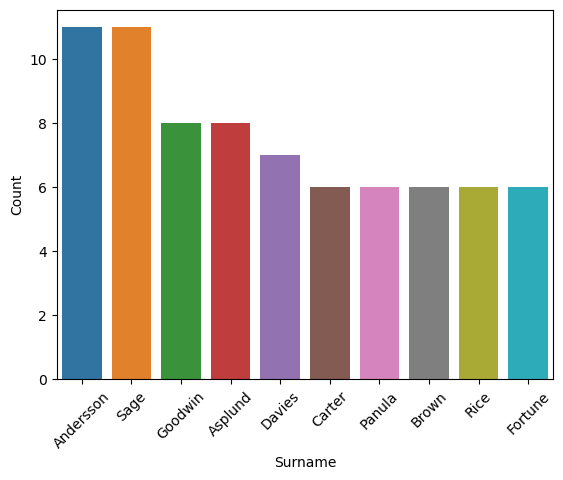

In [43]:
# In biểu đồ 10 họ phổ biến nhất
ax = sns.barplot(
    x="Surname",
    y="PassengerId",
    data=titanic.groupby("Surname")["PassengerId"] \
        .count() \
        .sort_values(ascending=False) \
        .reset_index()[:10]
)

# Chỉnh sửa plot - Xoay Họ một góc 45 độ để dễ nhìn hơn
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Chỉnh sửa plot - Thay đổi tên của các cột
ax.set_ylabel("Count")

plt.show()

Nguồn gốc của các họ:
- Andersson: Sweden (Thụy Điển), Finland (Phần Lan), Norway (Na Uy).
- Asplund: Sweden (Thụy Điển), Norway (Na Uy).
- Fortune: Từ vùng đất Fortune ở phía Đông Lothian, là một vùng của Vùng đất thấp Scotland.

## Tìm hiểu về hạng của hành khách

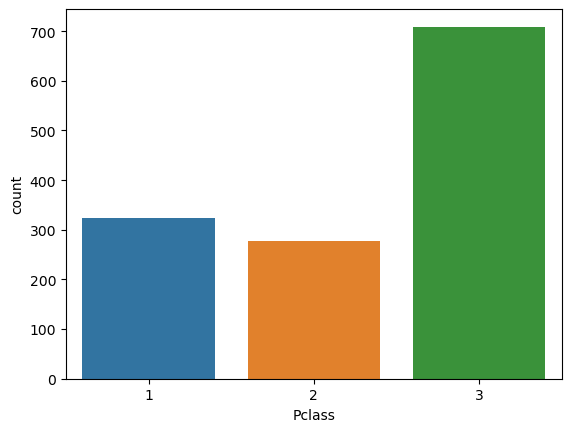

In [44]:
# Vẽ biểu đồ phân phối hạng của hành khách
sns.countplot(
    x="Pclass",
    data=titanic,
)
plt.show()

In [45]:
# In số đếm từng hành khách
titanic.groupby("Pclass")["PassengerId"] \
    .count() \
    .reset_index()

,Pclass,PassengerId
0,1,323
1,2,277
2,3,709


Hành khách trên tàu được chia thành ba hạng riêng biệt theo giá vé của họ: 

- Pclass = 1 - Những người đi khoang hạng nhất, hầu hết là những hành khách giàu có nhất trên tàu, bao gồm các thành viên nổi bật của tầng lớp thượng lưu, doanh nhân, chính trị gia, quân nhân cấp cao, các nhà công nghiệp, chủ ngân hàng, nghệ sĩ giải trí, xã hội và vận động viên chuyên nghiệp.
<br ><br >
- Pclass = 2 - Hành khách hạng hai chủ yếu là du khách thuộc tầng lớp trung lưu và bao gồm các giáo sư, tác giả, giáo sĩ và khách du lịch. 
<br ><br >
- Pclass = 3 - Hành khách hạng ba chủ yếu là những người nhập cư đến Hoa Kỳ và Canada.

## Tìm hiểu về giới tính của hành khách

In [46]:
# In số đếm từng hành khách
titanic.groupby("Sex")["PassengerId"] \
    .count() \
    .reset_index()

,Sex,PassengerId
0,female,466
1,male,843


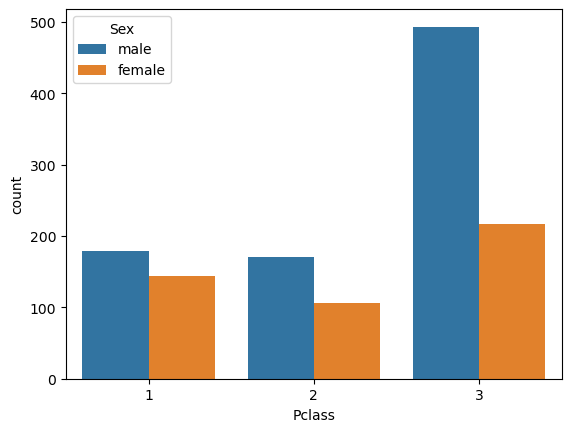

In [68]:
# Vẽ biểu đồ kết hợp giới tính và thứ hạng của từng hành khách
sns.countplot(
    x="Pclass",
    data=titanic,
    hue="Sex"
)
plt.show()

## Tìm hiểu về tuổi của từng hành khách

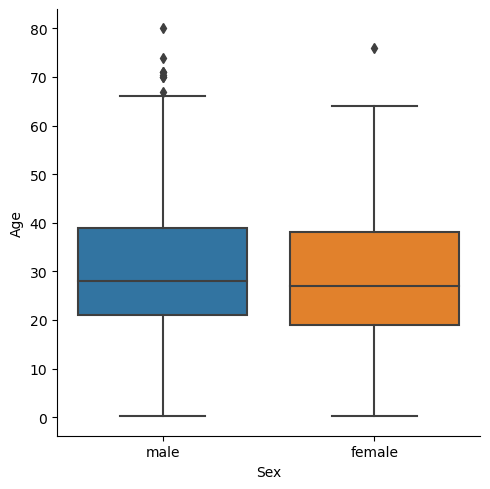

In [74]:
# Vẽ biểu đồ phân phối tuổi của các hành khách
sns.catplot(
    x="Sex",
    y="Age",
    data=titanic,
    kind="box"
)
plt.show()

## Tìm hiểu về hành khách sống sót

In [77]:
# Tỷ lệ hành khách sống sót
len(titanic[titanic["Survived"] == 1]) / len(titanic[titanic["Survived"].notna()])

0.3838383838383838

In [79]:
# Tỷ lệ sống só theo giới tính
titanic.groupby("Sex")["Survived"] \
    .value_counts(normalize=True)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: Survived, dtype: float64

In [62]:
# Số hành khách sống sót theo lứa tuổi
# Thêm cột nhóm tuổi tuổi
def get_age_category(age):
    if age >= 60:
        return "Elderly"
    elif age >= 40:
        return "Middle-Age"
    elif age >= 20:
        return "Adult"
    elif age >= 10:
        return "Teenager"
    else:
        return "Child"
    
# Thêm cột nhóm tuổi bằng lệnh apply
titanic["Agegroup"] = titanic["Age"].apply(get_age_category)

# In tập dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Adult


In [80]:
# Tỷ lệ sống sót theo nhóm tuổi
titanic.groupby("Agegroup")["Survived"] \
    .value_counts(normalize=True)

Agegroup    Survived
Adult       0.0         0.612403
            1.0         0.387597
Child       0.0         0.623431
            1.0         0.376569
Elderly     0.0         0.730769
            1.0         0.269231
Middle-Age  0.0         0.605839
            1.0         0.394161
Teenager    0.0         0.598039
            1.0         0.401961
Name: Survived, dtype: float64

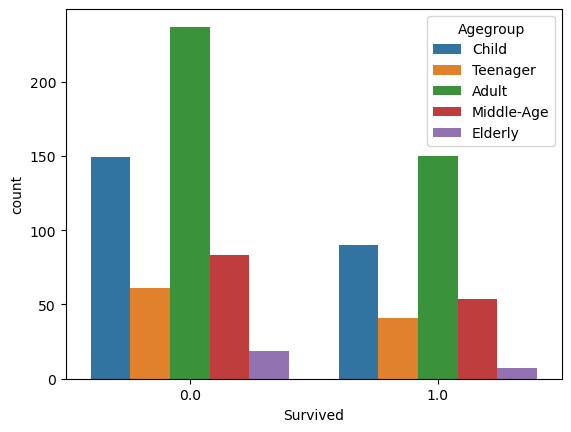

In [66]:
# Số hành khác sống sót theo nhóm tuổi
sns.countplot(
    x="Survived",
    data=titanic,
    hue="Agegroup",
    hue_order=["Child", "Teenager", "Adult", "Middle-Age", "Elderly"]
)
plt.show()